# Static Solution - Loads Combos
## *Matteo Franzoi* - Anno Accademico 2019/2020
### matricola 166788 (triennale)
---

In [141]:
import math
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from sympy import MatrixSymbol, Matrix
import numpy as np
from engineering_notation import EngNumber
from decimal import Decimal

In [142]:
q1 = Symbol('q1', positive=True);
q2 = Symbol('q2', positive=True);
q3 = Symbol('q3', positive=True);
q4 = Symbol('q4', positive=True);
q5 = Symbol('q5', positive=True);
q6 = Symbol('q6', positive=True);
#---------------------------------
ej = Symbol('ej', positive=True);
#---------------------------------
l1 = Symbol('l1', positive=True);
l2 = Symbol('l2', positive=True);
l3 = Symbol('l3', positive=True);
l4 = Symbol('l4', positive=True);
l5 = Symbol('l5', positive=True);
l6 = Symbol('l6', positive=True);
#---------------------------------
m1 = Symbol('m1');
m2 = Symbol('m2');
m3 = Symbol('m3');
m4 = Symbol('m4');
m5 = Symbol('m5');
m6 = Symbol('m6');
m7 = Symbol('m7');

In [143]:
F = 1/(6*ej) * Matrix([
    [ 2*(l1 + l2), l2, 0, 0, 0],
    [ l2, 2*(l2+l3), l3, 0, 0],
    [ 0, l3, 2*(l3+l4), l4, 0],
    [ 0, 0, l4, 2*(l4+l5), l5],
    [ 0, 0, 0, l5, 2*(l5+l6)]
])

In [144]:
Matrix(F)

Matrix([
[(2*l1 + 2*l2)/(6*ej),            l2/(6*ej),                    0,                    0,                    0],
[           l2/(6*ej), (2*l2 + 2*l3)/(6*ej),            l3/(6*ej),                    0,                    0],
[                   0,            l3/(6*ej), (2*l3 + 2*l4)/(6*ej),            l4/(6*ej),                    0],
[                   0,                    0,            l4/(6*ej), (2*l4 + 2*l5)/(6*ej),            l5/(6*ej)],
[                   0,                    0,                    0,            l5/(6*ej), (2*l5 + 2*l6)/(6*ej)]])

In [145]:
X = Matrix([ m2, m3, m4, m5, m6])
Matrix(X)

Matrix([
[m2],
[m3],
[m4],
[m5],
[m6]])

In [146]:
P = -1/(24*ej) * Matrix([
    q1*l1**3 + q2*l2**3,
    q2*l2**3 + q3*l3**3,
    q3*l3**3 + q4*l4**3, 
    q4*l4**3 + q5*l5**3, 
    q5*l5**3 + q6*l6**3            
])
Matrix(P)

Matrix([
[-(l1**3*q1 + l2**3*q2)/(24*ej)],
[-(l2**3*q2 + l3**3*q3)/(24*ej)],
[-(l3**3*q3 + l4**3*q4)/(24*ej)],
[-(l4**3*q4 + l5**3*q5)/(24*ej)],
[-(l5**3*q5 + l6**3*q6)/(24*ej)]])

In [226]:
def rij_q(mij, mi_j, li, qi):
       return (mi_j - mij)/li + qi* li/2
    
def rij(mij, mi_j, li):
    return (mi_j-mij)/li 


In [227]:
# E = 31476 MPa

def EJ(b,h, E):
    """Concrete Rectangular Section:
    J = b * h^3 / 12 [mm^4]
    E = 31476 [MPa]
    Result in N*mm^2"""
    return E * b * h**3 /12
    
EJ = EJ(300, 500, 31476)/1000
print('EJ = ',EJ, 'kN mm^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN mm^2')
EJ = EJ*10**6 
print('EJ = ',EJ, 'kN m^2 = ', Decimal(EJ).normalize().to_eng_string(),'kN m^2')

EJ =  98362500000.0 kN mm^2 =  98.3625E+9 kN mm^2
EJ =  9.83625e+16 kN m^2 =  98.3625E+15 kN m^2


In [228]:
F1 = F.evalf(subs={l1:3.000, l2:4.500, l3:4.000, l4:5.000, l5:6.150, l6:4.000, ej:EJ})
Fn = F1;
F1

Matrix([
[ 2.5416190113102e-17, 7.62485703393061e-18,                    0,                    0,                    0],
[7.62485703393061e-18, 2.88050154615157e-17, 6.77765069682721e-18,                    0,                    0],
[                   0, 6.77765069682721e-18, 3.04994281357225e-17, 8.47206337103401e-18,                    0],
[                   0,                    0, 8.47206337103401e-18, 3.77854026348117e-17, 1.04206379463718e-17],
[                   0,                    0,                    0, 1.04206379463718e-17, 3.43965772863981e-17]])

In [229]:
P1 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3.000, 4.500, 4.000, 5.000, 6.150, 4.000, EJ, 1, 0, 0, 0, 0, 0])))
P1

Matrix([
[-1.14372855508959e-17],
[                    0],
[                    0],
[                    0],
[                    0]])

In [230]:
sol1 = solve(F1 * X - P1, X)
X1 = list(sol1.values())
X1.insert(0, 0)
X1.insert(6, 0)
Matrix(X1)

Matrix([
[                   0],
[    -0.4913369425523],
[   0.137789808507666],
[ -0.0328526257862429],
[ 0.00803760602434188],
[-0.00243503827831046],
[                   0]])

In [233]:
R11 = rij_q(X1[0], X1[1], 3, 1);
R21 = rij(X1[1], X1[2], 4.5);
R31 = rij(X1[2], X1[3], 4);
R41 = rij(X1[3], X1[4], 5);
R51 = rij(X1[4], X1[5], 6.15);
R61 = rij(X1[5], X1[6], 4);
R1 = np.array([R11, R21, R31, R41, R51, R61])
Matrix(R1)

Matrix([
[    1.33622101914923],
[   0.139805944679992],
[ -0.0426606085734773],
[ 0.00817804636211696],
[-0.00170286899230119],
[0.000608759569577615]])

In [234]:
def H(s):
    if s <= 0:
        return 0
    else:
        return 1
Hv = np.vectorize(H)

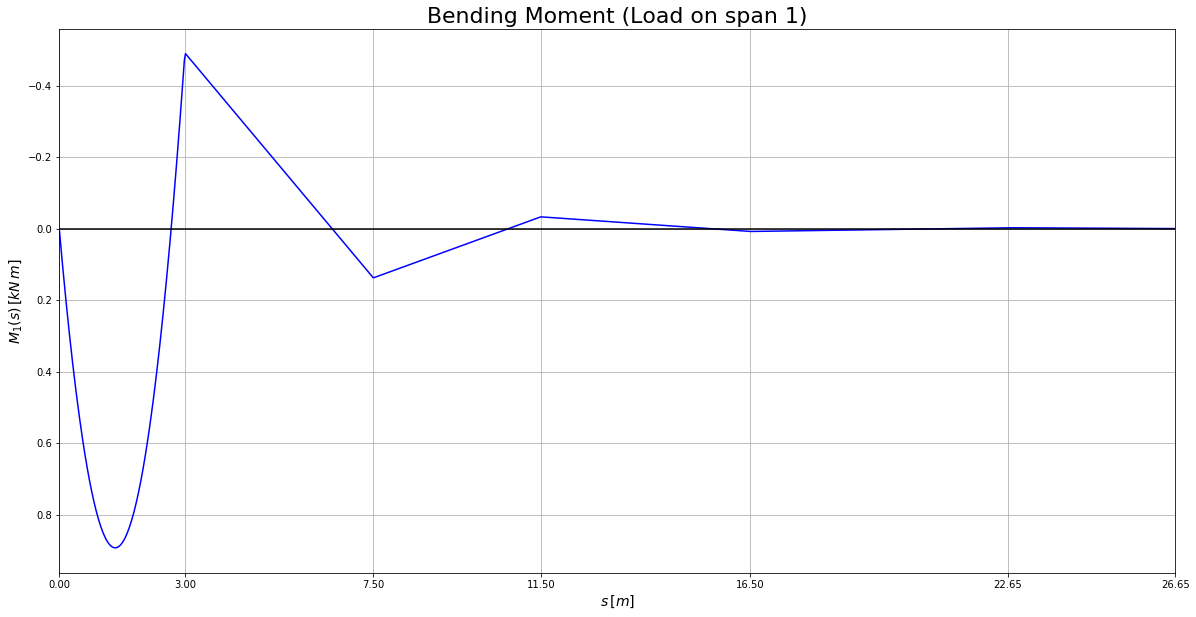

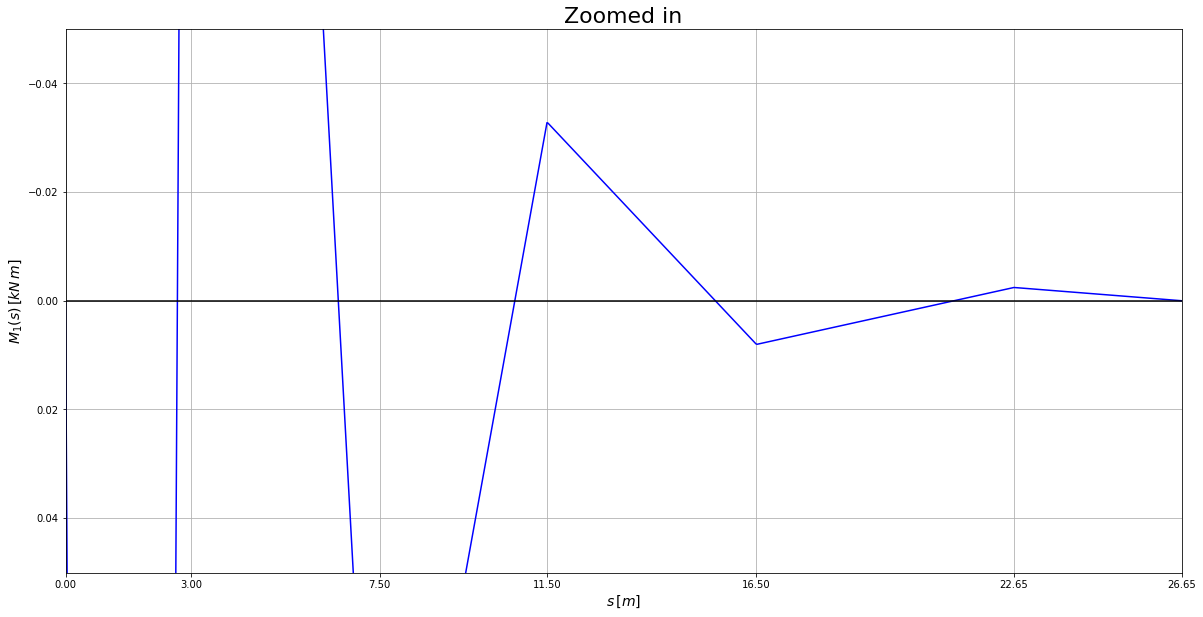

In [235]:
s = np.linspace(0,26.65, num=1000)
M1 = (X1[0] + R1[0] * s - s**2 /2) * (Hv(s) - Hv(s-3)) + (X1[1] + R1[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X1[2] + R1[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X1[3] + R1[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X1[4] + R1[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X1[5] + R1[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 1)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M1, color='blue')
ax3.set_xlim(15, 26.65) 
ax3.set_ylim(-.05, .05)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_1(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 2

In [236]:
P2 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 1, 0, 0, 0, 0])))
P2

Matrix([
[-3.86008387342737e-17],
[-3.86008387342737e-17],
[                    0],
[                    0],
[                    0]])

In [237]:
sol2 = solve(Fn * X - P2, X)
X2 = list(sol2.values())
X2.insert(0, 0)
X2.insert(6, 0)
Matrix(X2)

Matrix([
[                  0],
[  -1.19322157740064],
[  -1.08509474199787],
[  0.258714428066663],
[-0.0632961474416922],
[ 0.0191759264416949],
[                  0]])

In [238]:
R12 = rij(X2[0], X2[1], 3);
R22 = rij_q(X2[1], X2[2], 4.5, 1);
R32 = rij(X2[2], X2[3], 4);
R42 = rij(X2[3], X2[4], 5);
R52 = rij(X2[4], X2[5], 6.15);
R62 = rij(X2[5], X2[6], 4);
R2 = np.array([R12, R22, R32, R42, R52, R62])
Matrix(R2)

Matrix([
[  -0.397740525800213],
[    2.27402818564506],
[   0.335952292516133],
[  -0.064402115101671],
[  0.0134100933143719],
[-0.00479398161042372]])

In [239]:
s = np.linspace(0,26.65, num=1000)
M2 = (X2[0] + R2[0] * s) * (Hv(s) - Hv(s-3)) + (X2[1] + R2[1]*(s-3) - 1*(s-3)**2 /2) * (Hv(s-3) - Hv(s-(3+4.5))) + (X2[2] + R2[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X2[3] + R2[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X2[4] + R2[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X2[5] + R2[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

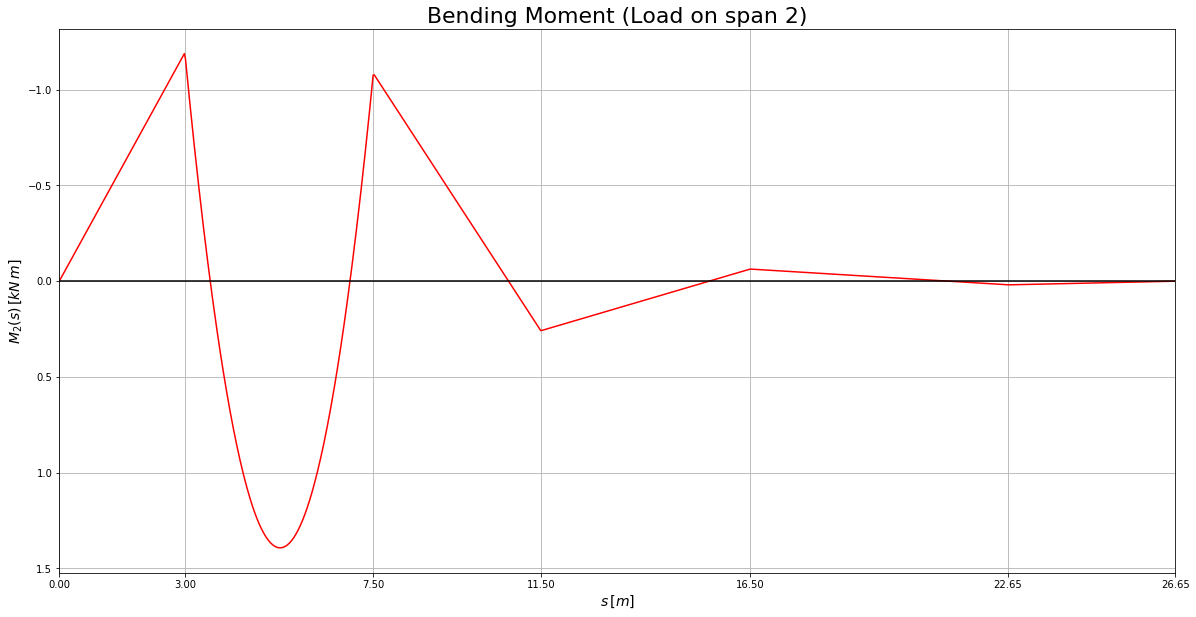

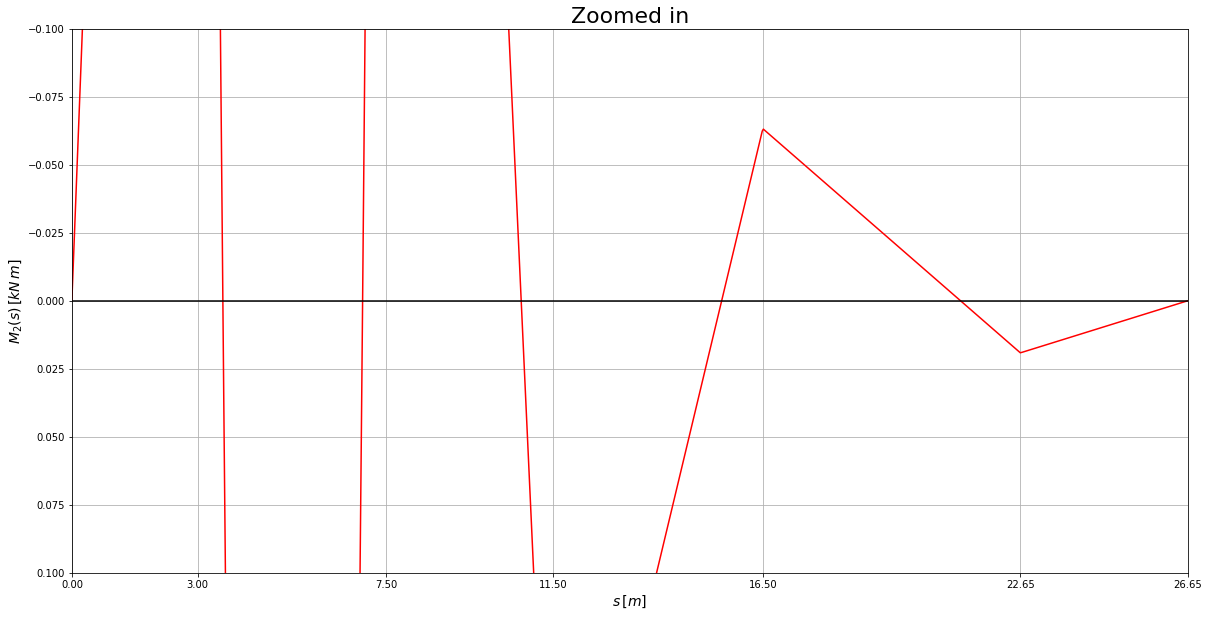

In [240]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 2)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M2, color='red')
ax3.set_xlim(16, 26.65) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_2(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()

---
#### Load on Span 3

In [241]:
P3 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 1, 0, 0, 0])))
P3

Matrix([
[                    0],
[-2.71106027873088e-17],
[-2.71106027873088e-17],
[                    0],
[                    0]])

In [243]:
sol3 = solve(Fn * X - P3, X)
X3 = list(sol3.values())
X3.insert(0, 0)
X3.insert(6, 0)
Matrix(X3)

Matrix([
[                  0],
[  0.248739988673004],
[ -0.829133295576679],
[ -0.756015981056257],
[  0.184964168263867],
[-0.0560359426021074],
[                  0]])

In [244]:
R13 = rij(X3[0], X3[1], 3);
R23 = rij(X3[1], X3[2], 4.5);
R33 = rij_q(X3[2], X3[3], 4, 1);
R43 = rij(X3[3], X3[4], 5);
R53 = rij(X3[4], X3[5], 6.15);
R63 = rij(X3[5], X3[6], 4);
R3 = np.array([R13, R23, R33, R43, R53, R63])
Matrix(R3)

Matrix([
[  0.082913329557668],
[  -0.23952739649993],
[   2.01827932863011],
[  0.188196029864025],
[-0.0391870098969065],
[ 0.0140089856505269]])

In [245]:
s = np.linspace(0,26.65, num=1000)
M3 = (X3[0] + R3[0] * s) * (Hv(s) - Hv(s-3)) + (X3[1] + R3[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X3[2] + R3[2]*(s-(3+4.5)) - 1*(s-(3+4.5))**2 /2)*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X3[3] + R3[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X3[4] + R3[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X3[5] + R3[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

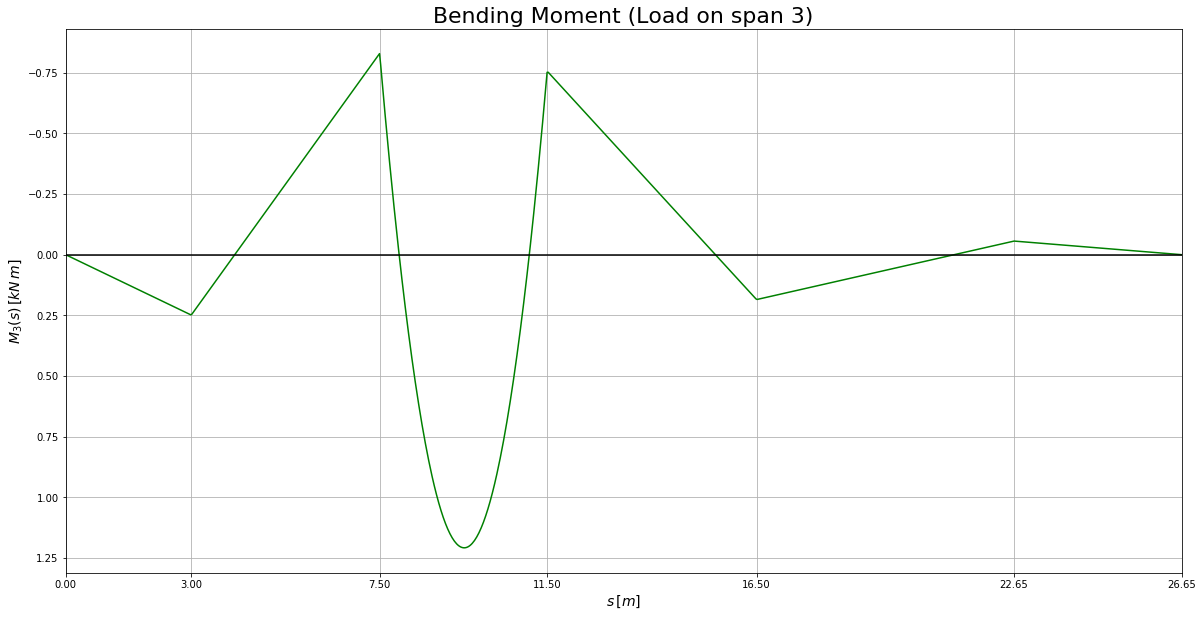

In [246]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M3, color='green')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_3(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 3)', fontsize='22')
plt.show()

---
#### Load on Span 4

In [247]:
P4 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 1, 0, 0])))
P4

Matrix([
[                    0],
[                    0],
[-5.29503960689626e-17],
[-5.29503960689626e-17],
[                    0]])

In [248]:
sol4 = solve(Fn * X - P4, X)
X4 = list(sol4.values())
X4.insert(0, 0)
X4.insert(6, 0)
Matrix(X4)

Matrix([
[                 0],
[-0.114884350749542],
[ 0.382947835831807],
[ -1.49828340769194],
[ -1.16253800097445],
[ 0.352197473201618],
[                 0]])

In [249]:
R14 = rij(X4[0], X4[1], 3);
R24 = rij(X4[1], X4[2], 4.5);
R34 = rij(X4[2], X4[3], 4);
R44 = rij_q(X4[3], X4[4], 5, 1);
R54 = rij(X4[4], X4[5], 6.15);
R64 = rij(X4[5], X4[6], 4);
R4 = np.array([R14, R24, R34, R44, R54, R64])
Matrix(R4)

Matrix([
[-0.0382947835831807],
[  0.110629374795855],
[ -0.470307810880937],
[    2.5671490813435],
[   0.24629845108554],
[-0.0880493683004045]])

In [250]:
s = np.linspace(0,26.65, num=1000)
M4 = (X4[0] + R4[0] * s) * (Hv(s) - Hv(s-3)) + (X4[1] + R4[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X4[2] + R4[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X4[3] + R4[3]*(s-(3+4.5+4)) - 1* (s-(3+4.5+4))**2 /2)* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X4[4] + R4[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X4[5] + R4[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

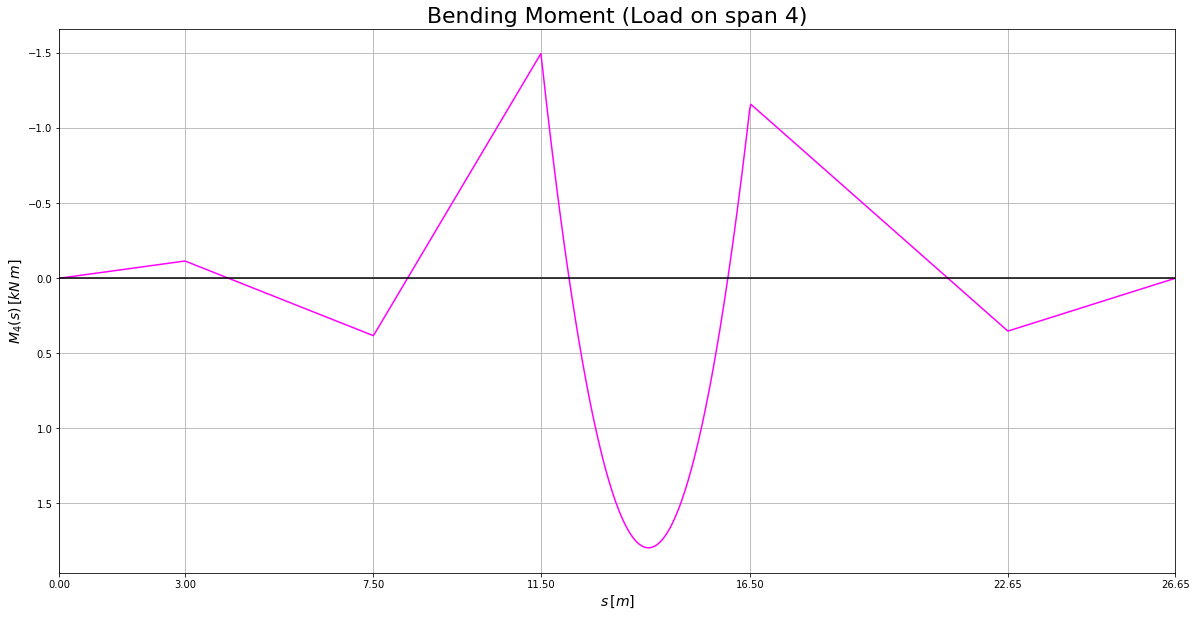

In [251]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M4, color='magenta')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_4(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 4)', fontsize='22')
plt.show()


---
#### Load on Span 5

In [252]:
P5 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 1, 0])))
P5

Matrix([
[                    0],
[                    0],
[                    0],
[-9.85336446816622e-17],
[-9.85336446816622e-17]])

In [253]:
sol5 = solve(Fn * X - P5, X)
X5 = list(sol5.values())
X5.insert(0, 0)
X5.insert(6, 0)
Matrix(X5)

Matrix([
[                0],
[0.048266821453029],
[-0.16088940484343],
[0.629479796449918],
[-2.13741574334497],
[-2.21709295213933],
[                0]])

In [255]:
R15 = rij(X5[0], X5[1], 3);
R25 = rij(X5[1], X5[2], 4.5);
R35 = rij(X5[2], X5[3], 4);
R45 = rij(X5[3], X5[4], 5);
R55 = rij_q(X5[4], X5[5], 6.15, 1);
R65 = rij(X5[5], X5[6], 4);
R5 = np.array([R15, R25, R35, R45, R55, R65])
Matrix(R5)

Matrix([
[  0.016088940484343],
[-0.0464791613992131],
[  0.197592300323337],
[ -0.553379107958977],
[    3.0620443562936],
[  0.554273238034834]])

In [256]:
s = np.linspace(0,26.65, num=1000)
M5 = (X5[0] + R5[0] * s) * (Hv(s) - Hv(s-3)) + (X5[1] + R5[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X5[2] + R5[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X5[3] + R5[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X5[4] + R5[4]*(s-(3+4.5+4+5)) - 1*(s-(3+4.5+4+5))**2 /2) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X5[5] + R5[5]*(s-(3+4.5+4+5+6.15))) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

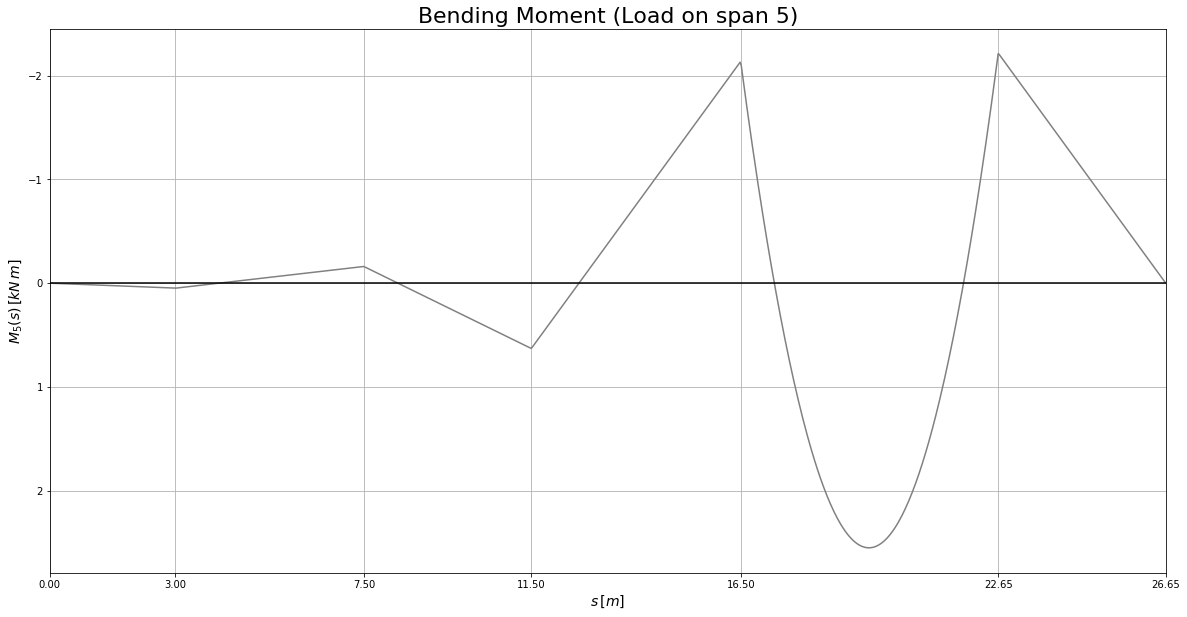

In [257]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M5, color='gray')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_5(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 5)', fontsize='22')
plt.show()

---
#### Load on Span 6

In [258]:
P6 = P.subs(list(zip([l1, l2, l3, l4, l5, l6, ej, q1, q2, q3, q4, q5, q6], [3, 4.5, 4, 5, 6.15, 4, EJ, 0, 0, 0, 0, 0, 1])))
P6

Matrix([
[                    0],
[                    0],
[                    0],
[                    0],
[-2.71106027873088e-17]])

In [259]:
sol6 = solve(Fn * X - P6, X)
X6 = list(sol6.values())
X6.insert(0, 0)
X6.insert(6, 0)
Matrix(X6)

Matrix([
[                   0],
[-0.00577194258562482],
[  0.0192398086187494],
[ -0.0752757512208568],
[   0.255600857500086],
[  -0.865613067666283],
[                   0]])

In [261]:
R16 = rij(X6[0], X6[1], 3);
R26 = rij(X6[1], X6[2], 4.5);
R36 = rij(X6[2], X6[3], 4);
R46 = rij(X6[3], X6[4], 5);
R56 = rij(X6[4], X6[5], 6.15);
R66 = rij_q(X6[5], X6[6], 4, 1);
R6 = np.array([R16, R26, R36, R46, R56, R66])
Matrix(R6)

Matrix([
[-0.00192398086187494],
[ 0.00555816693430538],
[ -0.0236288899599015],
[  0.0661753217441885],
[  -0.182311207344125],
[    2.21640326691657]])

In [262]:
s = np.linspace(0,26.65, num=1000)
M6 = (X6[0] + R6[0] * s) * (Hv(s) - Hv(s-3)) + (X6[1] + R6[1]*(s-3)) * (Hv(s-3) - Hv(s-(3+4.5))) + (X6[2] + R6[2]*(s-(3+4.5)))*(Hv(s-(3+4.5)) - Hv(s-(3+4.5+4))) + (X6[3] + R6[3]*(s-(3+4.5+4)))* (Hv(s-(3+4.5+4)) - Hv(s-(3+4.5+4+5))) + (X6[4] + R6[4]*(s-(3+4.5+4+5))) * (Hv(s-(3+4.5+4+5)) - Hv(s-(3+4.5+4+5+6.15))) + (X6[5] + R6[5]*(s-(3+4.5+4+5+6.15)) -  1 *(s-(3+4.5+4+5+6.15))**2 /2) * (Hv(s-(3+4.5+4+5+6.15)) - Hv(s-(3+4.5+4+5+6.15+4)))

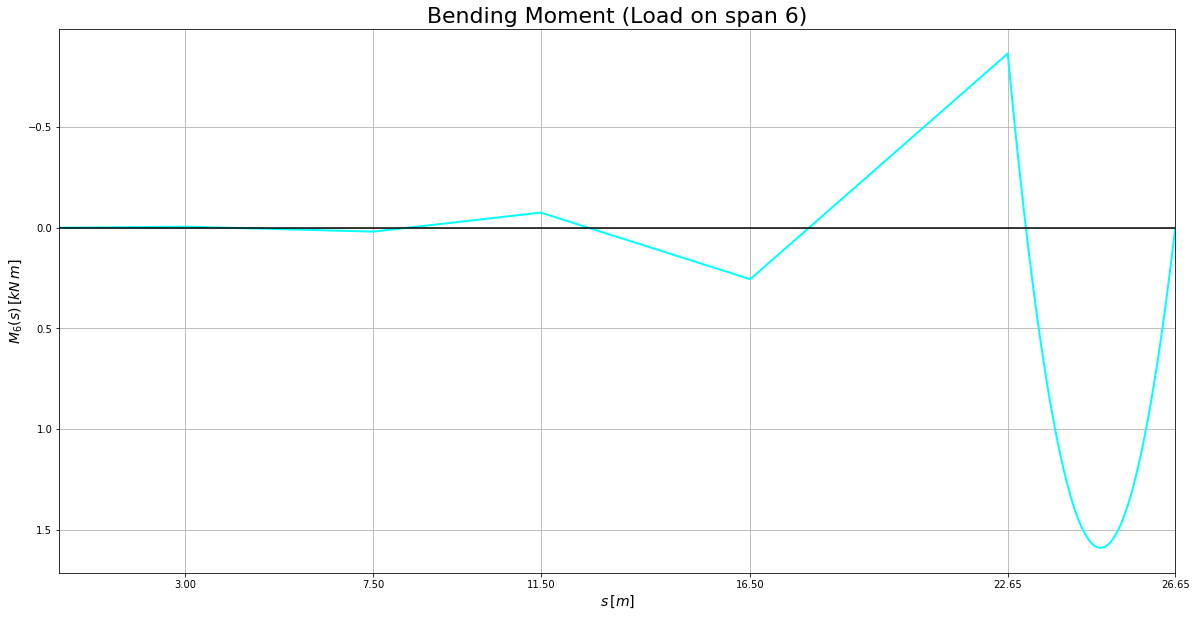

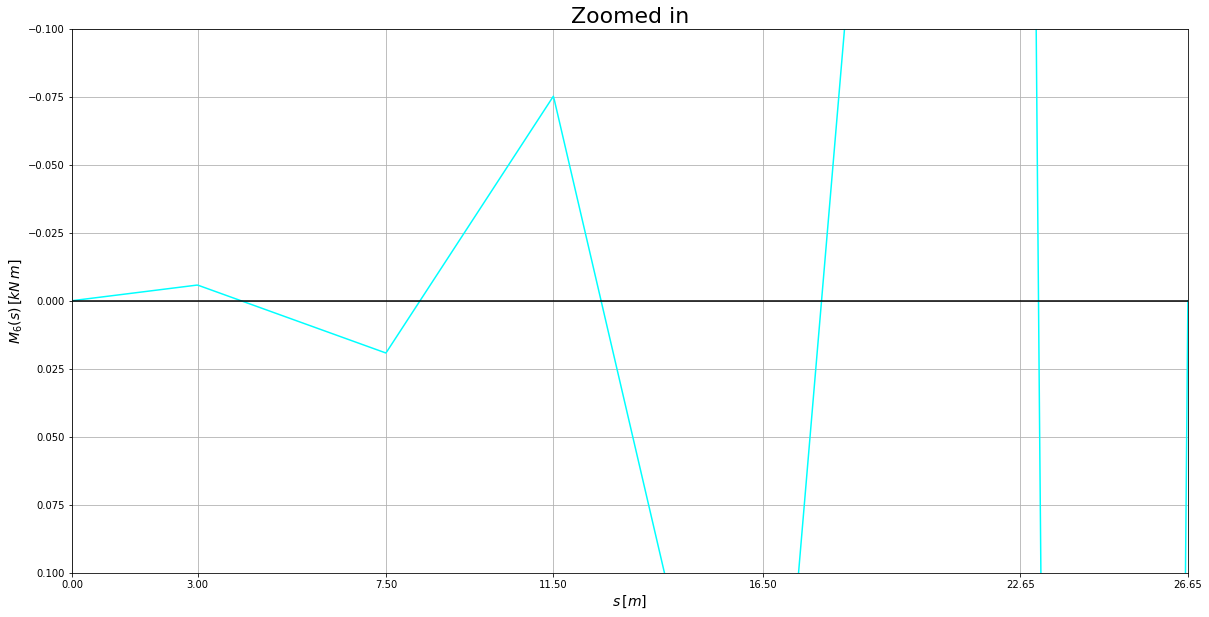

In [263]:
#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, M6, color='cyan', linewidth='2')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment (Load on span 6)', fontsize='22')
plt.show()

#-------------ZOOM-------------------

plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M6, color='cyan')
ax3.set_xlim(0, 7.5) 
ax3.set_ylim(-.1, .1)
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()


---

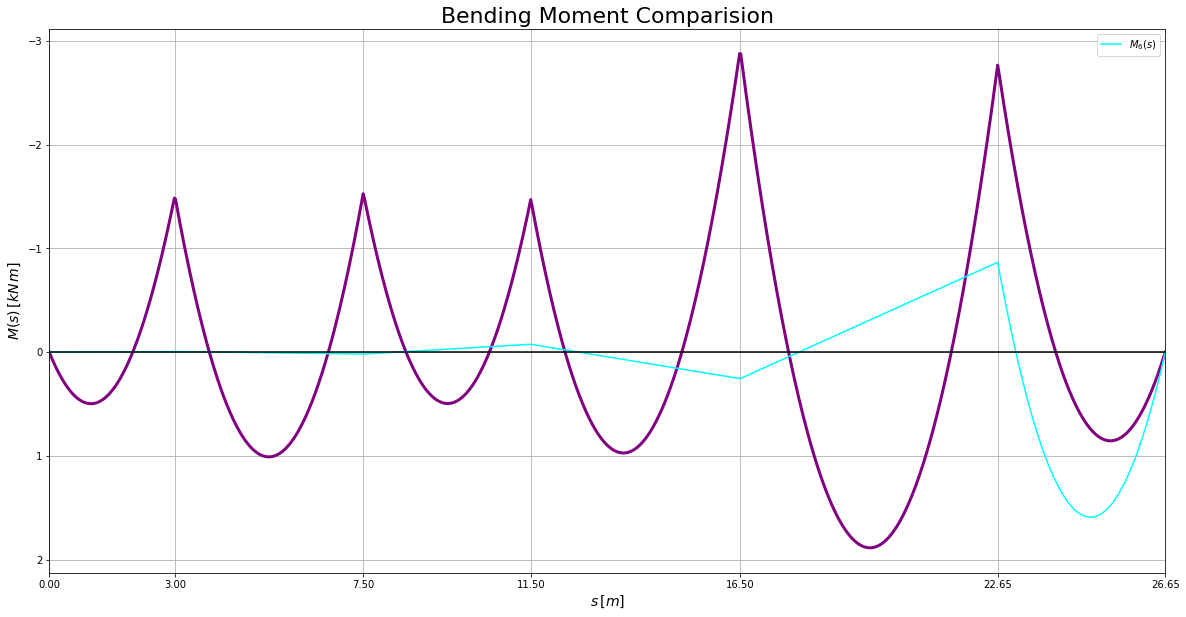

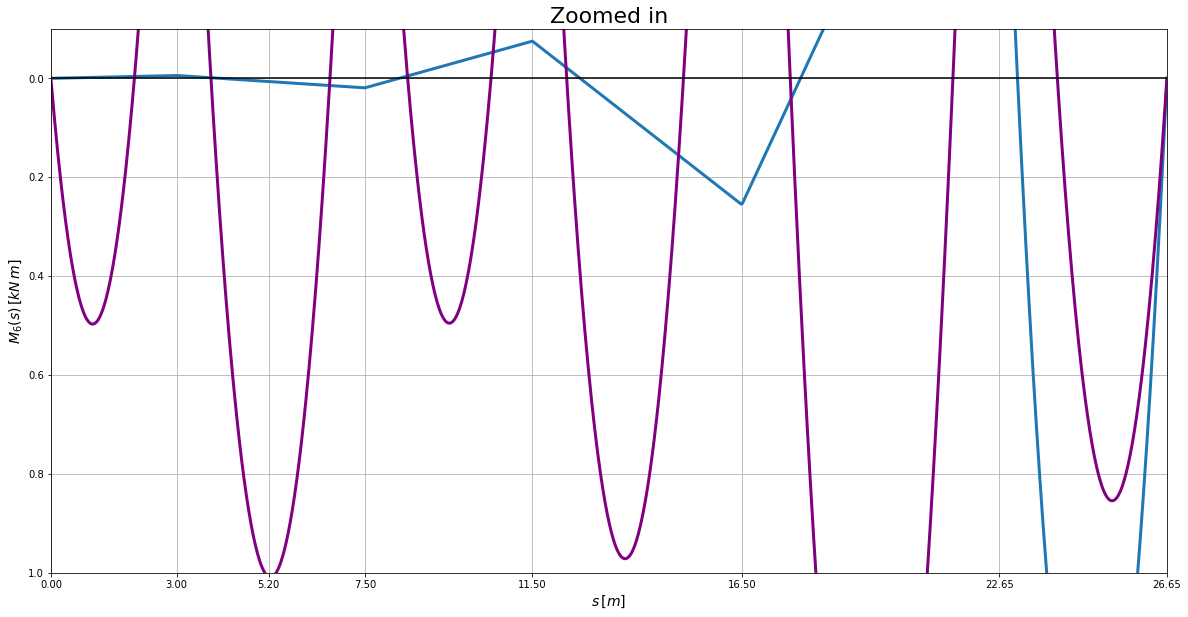

In [264]:
s = np.linspace(0,26.65, num=1000)

plt.figure(figsize=(20,10))

plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')

#plt.plot(s, M1, color='blue', label=r'$M_1(s)$')
#plt.plot(s, M2, color='red', label=r'$M_2(s)$')
#plt.plot(s, M3, color='green', label=r'$M_3(s)$')
#plt.plot(s, M4, color='magenta', label=r'$M_4(s)$')
#plt.plot(s, M5, color='gray', label=r'$M_5(s)$')
plt.plot(s, M6, color='cyan', label=r'$M_6(s)$')
plt.xlim(s.min(), s.max())
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment Comparision', fontsize='22')



plt.subplots(1,1, figsize=(20,10))
ax3 = plt.subplot()
ax3.plot(s, M6, linewidth='3')
ax3.set_xlim(0, 3) 
ax3.set_ylim(-.1, 1)
plt.plot(s, M1+M2+M3+M4+M5+M6, color='purple', linewidth='3')
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_6(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 5.2 ,7.5, 11.5, 16.5, 22.65, 26.65])
ax3.axhline(0, color='black')
ax3.set_title('Zoomed in', fontsize='22')
plt.show()



plt.show()

In [265]:
m1 = np.zeros(1000)
for i in range(0,999):
    if M1[i] > 0:
        m1[i] = M1[i]
    else:
        m1[i] = 0
        
m2 = np.zeros(1000)
for i in range(0,999):
    if M2[i] < 0:
        m2[i] = M2[i]
    else:
        m2[i] = 0

No handles with labels found to put in legend.


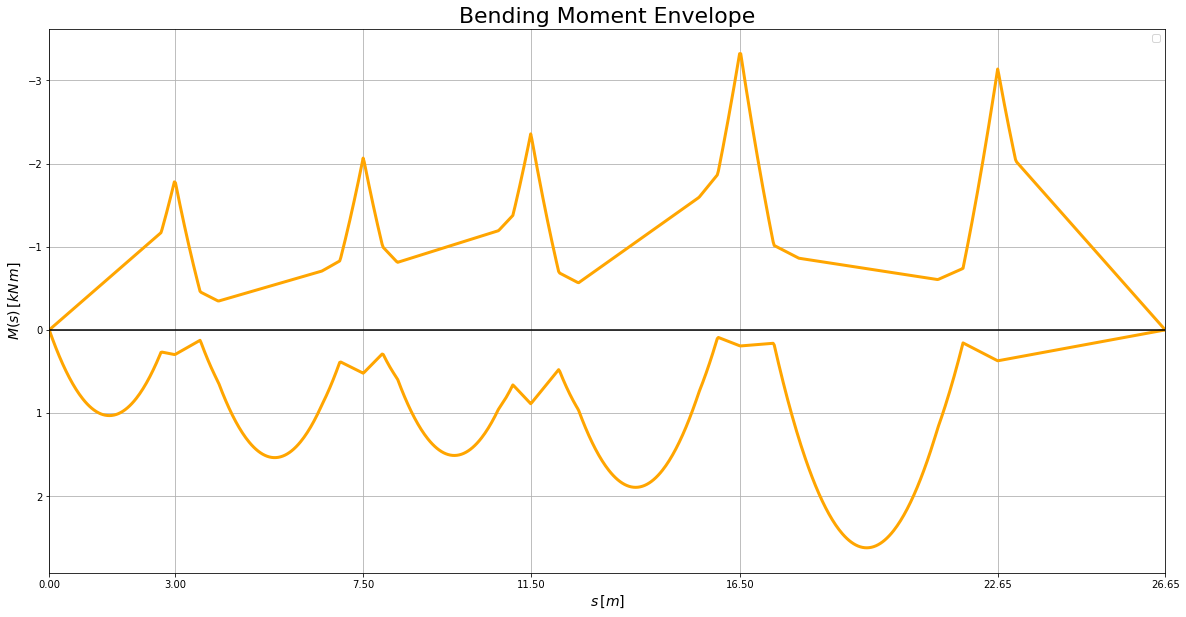

In [266]:
#from scipy.signal import hilbert

s = np.linspace(0,26.65, num=1000)

plt.figure(figsize=(20,10))

Mp = M1 * Hv(M1) + M2*Hv(M2) + M3*Hv(M3) + M4*Hv(M4) + M5*Hv(M5);
Mn = M1*Hv(-M1) + M2*Hv(-M2) + M3*Hv(-M3) + M4*Hv(-M4) + M5*Hv(-M5) + M6*Hv(-M6)

plt.plot(s,  M1 * Hv(M1) + M2*Hv(M2) + M3*Hv(M3) + M4*Hv(M4) + M5*Hv(M5), color='orange', linewidth='3' )
plt.plot(s, M1*Hv(-M1) + M2*Hv(-M2) + M3*Hv(-M3) + M4*Hv(-M4) + M5*Hv(-M5) + M6*Hv(-M6), color='orange', linewidth='3')

plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlim(0, 26.65)
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('Bending Moment Envelope', fontsize='22')
plt.show()

---
### CARICHI

In [271]:
Q1max_slu = 134.92;
Q1min_slu = 46.25

Q2max_slu = 101.32
Q2min_slu = 38.8

Q3max_slu = 76.67
Q3min_slu = 33.32

---
### C1: MAX-MIN-MAX-MIN-MAX-MIN

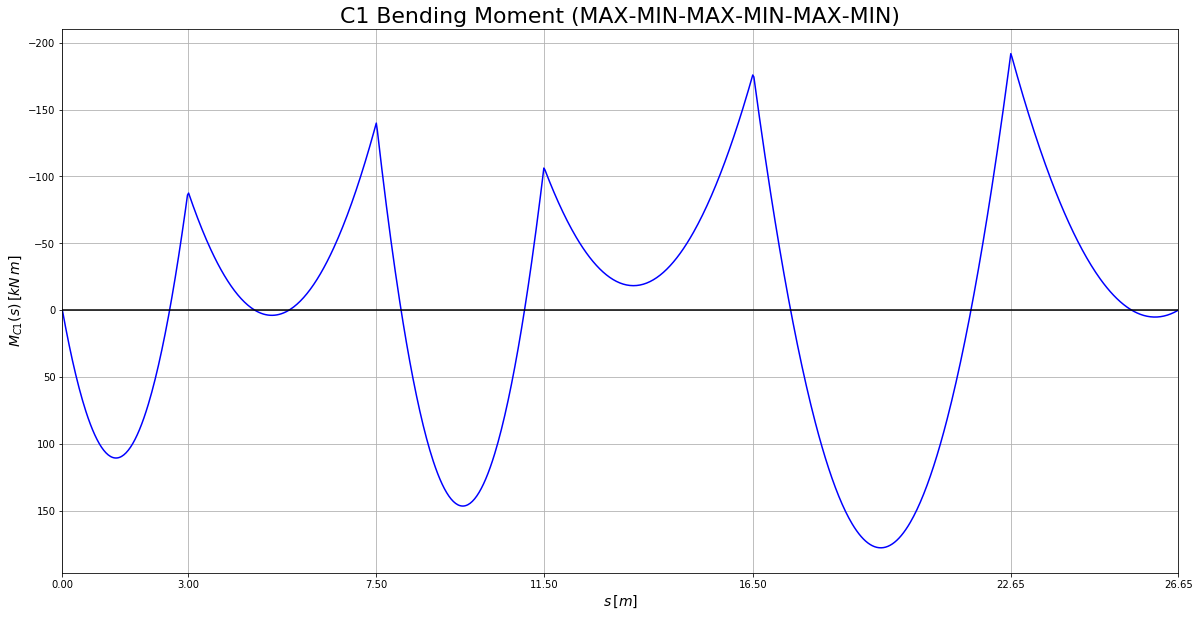

In [281]:
s = np.linspace(0,26.65, num=1000)
MC1 = M1*Q1max_slu + M2*Q1min_slu + M3*Q1max_slu + M4*Q2min_slu + M5*Q3max_slu + M6*Q3min_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC1, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C1}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C1 Bending Moment (MAX-MIN-MAX-MIN-MAX-MIN)', fontsize='22')
plt.show()

---
### N1: MAX-MAX-MIN-MAX-MIN-MAX

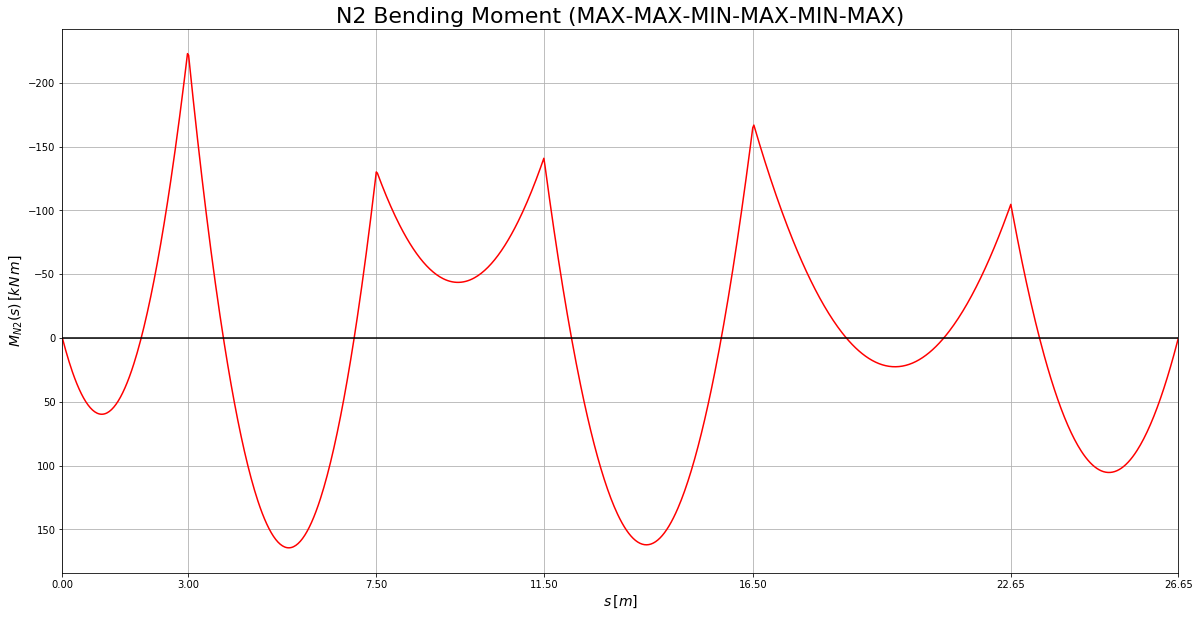

In [283]:
s = np.linspace(0,26.65, num=1000)
MN2 = M1*Q1max_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MN2, color='red')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{N2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('N2 Bending Moment (MAX-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()

---
### C2: MIN-MAX-MIN-MAX-MIN-MAX

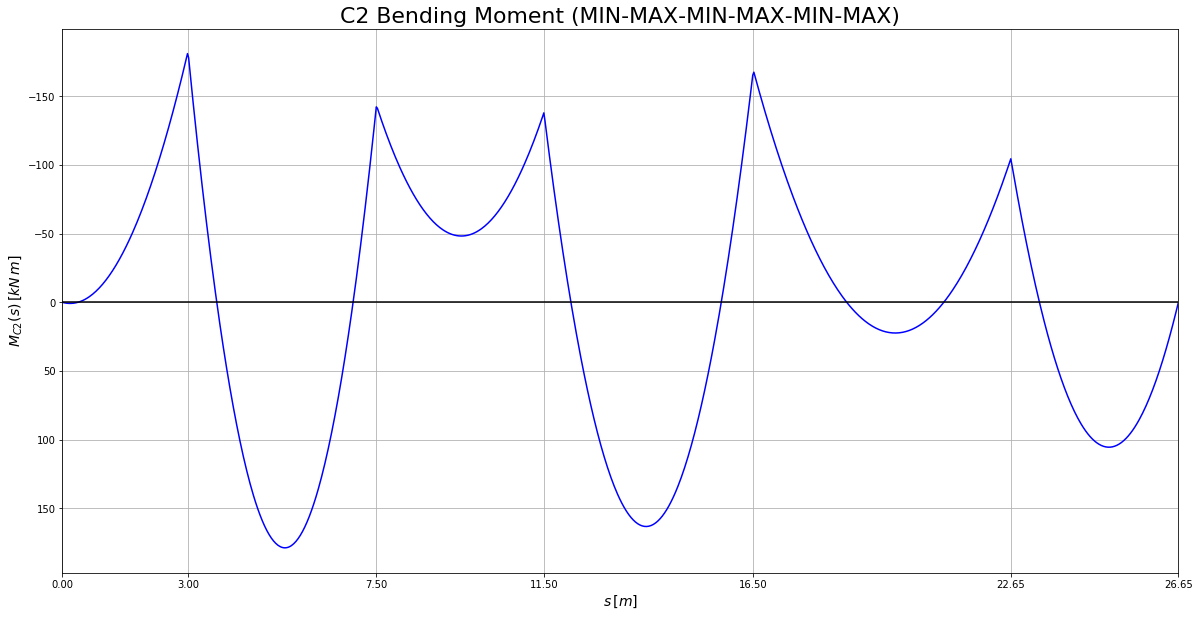

In [284]:
s = np.linspace(0,26.65, num=1000)
MC2 = M1*Q1min_slu + M2*Q1max_slu + M3*Q1min_slu + M4*Q2max_slu + M5*Q3min_slu + M6*Q3max_slu

#----------PLOT------------------

plt.figure(figsize=(20,10))
plt.plot(s, MC2, color='blue')
plt.xlim(s.min(), s.max())
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel(r'$s\,[m]$', fontsize='14')
plt.ylabel(r'$M_{C2}(s)\,[kN\,m]$', fontsize='14')
plt.xticks([0, 3, 7.5, 11.5, 16.5, 22.65, 26.65])
plt.axhline(0, color='black')
plt.title('C2 Bending Moment (MIN-MAX-MIN-MAX-MIN-MAX)', fontsize='22')
plt.show()